In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix 

bike_data=pd.read_csv('day.csv', sep=',')
bike_data2=pd.read_csv('hour.csv', sep=',')

In [2]:
bike_data.mean()

instant        366.000000
season           2.496580
yr               0.500684
mnth             6.519836
holiday          0.028728
weekday          2.997264
workingday       0.683995
weathersit       1.395349
temp             0.495385
atemp            0.474354
hum              0.627894
windspeed        0.190486
casual         848.176471
registered    3656.172367
cnt           4504.348837
dtype: float64

In [46]:
bike_data.tail()

instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
726      727 2012-12-27       1   1    12        0        4           1   
727      728 2012-12-28       1   1    12        0        5           1   
728      729 2012-12-29       1   1    12        0        6           0   
729      730 2012-12-30       1   1    12        0        0           0   
730      731 2012-12-31       1   1    12        0        1           1   

     weathersit      temp  ...  IsWednesday  IsThursday  IsFriday  IsSaturday  \
726           2  0.254167  ...          0.0         1.0       0.0         0.0   
727           2  0.253333  ...          0.0         0.0       1.0         0.0   
728           2  0.253333  ...          0.0         0.0       0.0         1.0   
729           1  0.255833  ...          0.0         0.0       0.0         0.0   
730           2  0.215833  ...          0.0         0.0       0.0         0.0   

     IsWeatherNice  IsMisty  IsSpring  IsSummer  IsFall     TempC  
726            0.0      1.0       0.0       0.0     0.0  3.945849  
727            0.0      1.0       0.0       0.0     0.0  3.906651  
728            0.0      1.0       0.0       0.0     0.0  3.906651  
729            1.0      0.0       0.0       0.0     0.0  4.024151  
730            0.0      1.0       0.0       0.0     0.0  2.144151  

[5 rows x 28 columns]

In [4]:
bike_data2.head()

instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1

In [7]:
bike_data.count

<bound method DataFrame.count of      instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1  2011-01-01       1   0     1        0        6           0   
1          2  2011-01-02       1   0     1        0        0           0   
2          3  2011-01-03       1   0     1        0        1           1   
3          4  2011-01-04       1   0     1        0        2           1   
4          5  2011-01-05       1   0     1        0        3           1   
..       ...         ...     ...  ..   ...      ...      ...         ...   
726      727  2012-12-27       1   1    12        0        4           1   
727      728  2012-12-28       1   1    12        0        5           1   
728      729  2012-12-29       1   1    12        0        6           0   
729      730  2012-12-30       1   1    12        0        0           0   
730      731  2012-12-31       1   1    12        0        1           1   

     weathersit      temp     atemp       hum  windspe

In [99]:
bike_data.info()
#no null entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [100]:
bike_data2.info()
#no null entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [2]:
bike_data['dteday']=pd.to_datetime(bike_data['dteday'])
bike_data2['dteday']=pd.to_datetime(bike_data2['dteday'])
#bike_data.loc[bike_data['holiday'] == 0, 'holiday'] = False
#bike_data.loc[bike_data['holiday'] == 1, 'holiday'] = True
#bike_data2.loc[bike_data2['holiday'] == 0, 'holiday'] = False
#bike_data2.loc[bike_data2['holiday'] == 1, 'holiday'] = True
#bike_data.loc[bike_data['season'] == 1, 'season'] = 'Winter'
#bike_data.loc[bike_data['season'] == 2, 'season'] = 'Spring'
#bike_data.loc[bike_data['season'] == 3, 'season'] = 'Summer'
#bike_data.loc[bike_data['season'] == 4, 'season'] = 'Fall'
#bike_data2.loc[bike_data2['season'] == 1, 'season'] = 'Winter'
#bike_data2.loc[bike_data2['season'] == 2, 'season'] = 'Spring'
#bike_data2.loc[bike_data2['season'] == 3, 'season'] = 'Summer'
#bike_data2.loc[bike_data2['season'] == 4, 'season'] = 'Fall'
#bike_data.loc[bike_data['workingday'] == 0, 'workingday'] = False
#bike_data.loc[bike_data['workingday'] == 1, 'workingday'] = True
#bike_data2.loc[bike_data2['workingday'] == 0, 'workingday'] = False
#bike_data2.loc[bike_data2['workingday'] == 1, 'workingday'] = True
#bike_data.loc[bike_data['weathersit'] == 1, 'weather'] = 'Great'
#bike_data.loc[bike_data['weathersit'] == 2, 'weather'] = 'OK'
#bike_data.loc[bike_data['weathersit'] == 3, 'weather'] = 'Bad'
#bike_data.loc[bike_data['weathersit'] == 4, 'weather'] = 'Terrible'
#bike_data2.loc[bike_data2['weathersit'] == 1, 'weather'] = 'Great'
#bike_data2.loc[bike_data2['weathersit'] == 2, 'weather'] = 'OK'
#bike_data2.loc[bike_data2['weathersit'] == 3, 'weather'] = 'Bad'
#bike_data2.loc[bike_data2['weathersit'] == 4, 'weather'] = 'Terrible'



In [27]:
bike_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  object        
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  object        
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  object        
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [112]:
bike_data2.head()

instant     dteday  season  yr  mnth  hr holiday  weekday workingday  \
0        1 2011-01-01       1   0     1   0   False        6      False   
1        2 2011-01-01       1   0     1   1   False        6      False   
2        3 2011-01-01       1   0     1   2   False        6      False   
3        4 2011-01-01       1   0     1   3   False        6      False   
4        5 2011-01-01       1   0     1   4   False        6      False   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt weather  
0           1  0.24  0.2879  0.81        0.0       3          13   16   Great  
1           1  0.22  0.2727  0.80        0.0       8          32   40   Great  
2           1  0.22  0.2727  0.80        0.0       5          27   32   Great  
3           1  0.24  0.2879  0.75        0.0       3          10   13   Great  
4           1  0.24  0.2879  0.75        0.0       0           1    1   Great

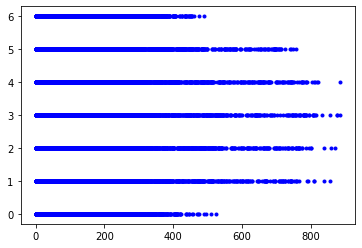

In [33]:
plt.plot(bike_data2['registered'], bike_data2['weekday'], 'b.')
plt.show()
#We need to encode weather

In [3]:
# Encoding categorical data
# Encoding the Independent Variable
#LabelEncoder=not necessary since 'weekday' and 'weathersit' are already label encoded
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
onehotencoder = OneHotEncoder()
bike_newdata= onehotencoder.fit_transform(np.c_[(bike_data['weekday'], bike_data['weathersit'], bike_data['season'])]).toarray()
#weather is subdivided in three categories here!! Not 4
bike_newdata2= onehotencoder.fit_transform(np.c_[(bike_data2['weekday'], bike_data2['weathersit'], bike_data2['season'], bike_data2['hr'], bike_data2['mnth'])]).toarray()
bike_newdata[0,:]

array([0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0.])

In [4]:
#Stop the Dummy Variable Trap
bike_newdata=np.c_[(bike_newdata[:,1:10], bike_newdata[:,12:])]
bike_newdata2=np.c_[(bike_newdata2[:,1:10], bike_newdata2[:,12:39], bike_newdata2[:,41:])]
bike_newdata[0,:]

array([0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.])

In [5]:
#fullinfo=np.c_[(bike_data, bike_newdata)]
#fullinfo2=np.c_[(bike_data2, bike_newdata2)]
bike_data2['IsMonday']=bike_newdata2[:,0]
bike_data2['IsTuesday']=bike_newdata2[:,1]
bike_data2['IsWednesday']=bike_newdata2[:,2]
bike_data2['IsThursday']=bike_newdata2[:,3]
bike_data2['IsFriday']=bike_newdata2[:,4]
bike_data2['IsSaturday']=bike_newdata2[:,5]
bike_data2['IsWeatherNice']=bike_newdata2[:,6]
bike_data2['IsMisty']=bike_newdata2[:,7]
bike_data2['IsRainy']=bike_newdata2[:,8]
bike_data2['IsSpring']=bike_newdata2[:,9]
bike_data2['IsSummer']=bike_newdata2[:,10]
bike_data2['IsFall']=bike_newdata2[:,11]
bike_data2['HourIs0']=bike_newdata2[:,12]
bike_data2['HourIs1']=bike_newdata2[:,13]
bike_data2['HourIs2']=bike_newdata2[:,14]
bike_data2['HourIs3']=bike_newdata2[:,15]
bike_data2['HourIs4']=bike_newdata2[:,16]
bike_data2['HourIs5']=bike_newdata2[:,17]
bike_data2['HourIs6']=bike_newdata2[:,18]
bike_data2['HourIs7']=bike_newdata2[:,19]
bike_data2['HourIs8']=bike_newdata2[:,20]
bike_data2['HourIs9']=bike_newdata2[:,21]
bike_data2['HourIs10']=bike_newdata2[:,22]
bike_data2['HourIs11']=bike_newdata2[:,23]
bike_data2['HourIs12']=bike_newdata2[:,24]
bike_data2['HourIs13']=bike_newdata2[:,25]
bike_data2['HourIs14']=bike_newdata2[:,26]
bike_data2['HourIs15']=bike_newdata2[:,27]
bike_data2['HourIs16']=bike_newdata2[:,28]
bike_data2['HourIs17']=bike_newdata2[:,29]
bike_data2['HourIs18']=bike_newdata2[:,30]
bike_data2['HourIs19']=bike_newdata2[:,31]
bike_data2['HourIs20']=bike_newdata2[:,32]
bike_data2['HourIs21']=bike_newdata2[:,33]
bike_data2['HourIs22']=bike_newdata2[:,34]
bike_data['IsMonday']=bike_newdata[:,0]
bike_data['IsTuesday']=bike_newdata[:,1]
bike_data['IsWednesday']=bike_newdata[:,2]
bike_data['IsThursday']=bike_newdata[:,3]
bike_data['IsFriday']=bike_newdata[:,4]
bike_data['IsSaturday']=bike_newdata[:,5]
bike_data['IsWeatherNice']=bike_newdata[:,6]
bike_data['IsMisty']=bike_newdata[:,7]
bike_data['IsSpring']=bike_newdata[:,8]
bike_data['IsSummer']=bike_newdata[:,9]
bike_data['IsFall']=bike_newdata[:,10]
bike_data['TempC']=bike_data['temp']*47-8



#X=np.c_[(bike_data2.iloc[:,-4:], bike_data2['weather'])]
#y=bike_data2['registered']
bike_data.head()

instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1 2011-01-01       1   0     1        0        6           0   
1        2 2011-01-02       1   0     1        0        0           0   
2        3 2011-01-03       1   0     1        0        1           1   
3        4 2011-01-04       1   0     1        0        2           1   
4        5 2011-01-05       1   0     1        0        3           1   

   weathersit      temp  ...  IsWednesday  IsThursday  IsFriday  IsSaturday  \
0           2  0.344167  ...          0.0         0.0       0.0         1.0   
1           2  0.363478  ...          0.0         0.0       0.0         0.0   
2           1  0.196364  ...          0.0         0.0       0.0         0.0   
3           1  0.200000  ...          0.0         0.0       0.0         0.0   
4           1  0.226957  ...          1.0         0.0       0.0         0.0   

   IsWeatherNice  IsMisty  IsSpring  IsSummer  IsFall     TempC  
0            0.0      1.0       0.0       0.0     0.0  8.175849  
1            0.0      1.0       0.0       0.0     0.0  9.083466  
2            1.0      0.0       0.0       0.0     0.0  1.229108  
3            1.0      0.0       0.0       0.0     0.0  1.400000  
4            1.0      0.0       0.0       0.0     0.0  2.666979  

[5 rows x 28 columns]

In [9]:
bike_data['workingday']=bike_data['workingday'].astype(bool)
sns.set(rc={'figure.figsize':(11,8)})

sns.set_context("paper", font_scale=1, rc={"lines.linewidth": 2.5})
#sns.set(style="ticks", context="talk")
#plt.style.use("dark_background")
sns.set_style("dark")

#fig, ax = plt.subplots()
ax = px.scatter(bike_data[['TempC','cnt','workingday']], x = 'TempC', y = 'cnt',
               color = 'workingday', title='Temperature-wise daily distribution of bike rentals', labels={'TempC':'Temperature in Celsius', 'cnt': 'Users', 'workingday':'Is it a working day?'});
ax.update_layout(font_size=15, title_font_size=16)

In [10]:
ax.write_html('temp.html')

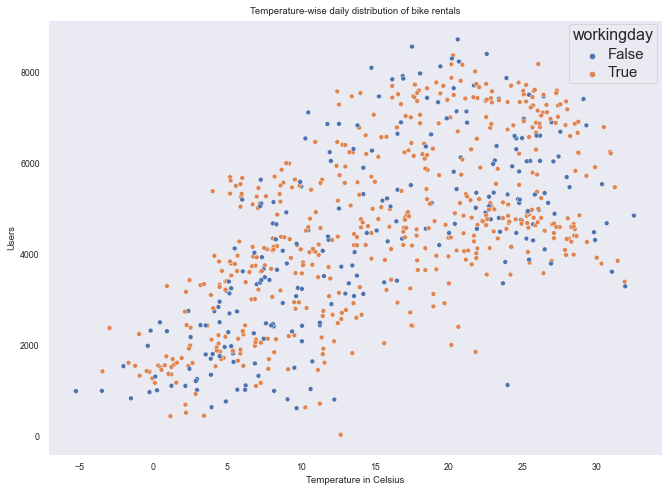

In [8]:
import seaborn as sns

sns.set(rc={'figure.figsize':(11,8)})

sns.set_context("paper", font_scale=1, rc={"lines.linewidth": 2.5})
#sns.set(style="ticks", context="talk")
#plt.style.use("dark_background")
sns.set_style("dark")

#fig, ax = plt.subplots()
ax = sns.scatterplot(data = bike_data[['TempC','cnt','workingday']], x = 'TempC', y = 'cnt',
               hue = 'workingday');

plt.setp(ax.get_legend().get_texts(), fontsize='15') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='16') # for legend title

ax.set(title = 'Temperature-wise daily distribution of bike rentals',ylabel= 'Users', xlabel='Temperature in Celsius');

In [11]:
sns.set(rc={'figure.figsize':(11,8)})

sns.set_context("paper", font_scale=1, rc={"lines.linewidth": 2.5})
#sns.set(style="ticks", context="talk")
#plt.style.use("dark_background")
sns.set_style("dark")

#fig, ax = plt.subplots()
ax = px.scatter(bike_data[bike_data['season']==3][['hum','cnt','workingday']], x = bike_data[bike_data['season']==3]['hum']*100, y = 'cnt',
               color = 'workingday', title='Humidity-wise daily distribution of bike rentals during Summer', labels={'x':'Humidity in percent', 'cnt': 'Users', 'workingday':'Is it a working day?'});
ax.update_layout(font_size=15, title_font_size=16)

In [12]:
ax.write_html('hum.html')

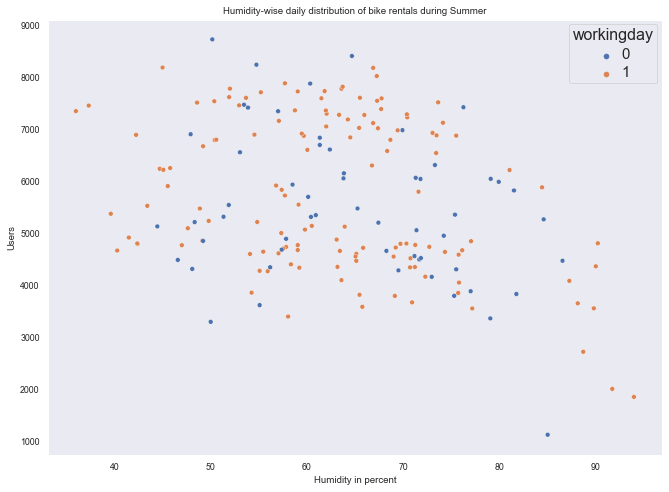

In [45]:
sns.set(rc={'figure.figsize':(11,8)})

sns.set_context("paper", font_scale=1, rc={"lines.linewidth": 2.5})
#sns.set(style="ticks", context="talk")
#plt.style.use("dark_background")
sns.set_style("dark")

#fig, ax = plt.subplots()
ax = sns.scatterplot(x = bike_data[bike_data['season']==3]['hum']*100, y = bike_data[bike_data['season']==3]['cnt'], hue = bike_data[bike_data['season']==3]['workingday']);

plt.setp(ax.get_legend().get_texts(), fontsize='15') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='16') # for legend title

ax.set(title = 'Humidity-wise daily distribution of bike rentals during Summer',ylabel= 'Users', xlabel='Humidity in percent');

In [8]:
fullinfo2=bike_data2
np.c_[(fullinfo2.iloc[:,6], fullinfo2.iloc[:,11:14], fullinfo2.iloc[:,17:])]
bike_data2.iloc[:,26]

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
17374    0.0
17375    0.0
17376    0.0
17377    0.0
17378    0.0
Name: IsSpring, Length: 17379, dtype: float64

In [9]:
X=np.c_[(fullinfo2.iloc[:,6],fullinfo2.iloc[:,10], fullinfo2.iloc[:,12:14], fullinfo2.iloc[:,17:])]#6: holiday, 10: temp, 11: atemp, 12: hum, 13: windspeed, 17-22: Mon-sat, 23-25: Nice-Rainy, 26-28: Spring-Fall, 29-51: 0-22h
y=fullinfo2.iloc[:,16]#14: casual, 15: registered, 16: all
X = np.array(X, dtype=float)
y = np.array(y, dtype=float)


In [10]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=1)

In [11]:
#Linear Regression
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(Xtrain,ytrain)
print(regressor.score(Xtest,ytest))
Xtrain = np.append (arr=np.ones([Xtrain.shape[0],1]).astype(int), values = Xtrain, axis = 1)
Xtest = np.append (arr=np.ones([Xtest.shape[0],1]).astype(int), values = Xtest, axis = 1)
import statsmodels.api as sm
#X_opt = [0]
regressor = sm.OLS(ytrain, Xtrain).fit()
print(regressor.summary())

0.6235148348861859
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     563.0
Date:                Mon, 01 Feb 2021   Prob (F-statistic):               0.00
Time:                        11:56:16   Log-Likelihood:                -79740.
No. Observations:               13034   AIC:                         1.596e+05
Df Residuals:                   12994   BIC:                         1.599e+05
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.5919     78.398 

In [24]:
#Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
regressor=RandomForestRegressor(n_estimators=10, random_state=0)
regressor.fit(Xtrain,ytrain)
q=[]
for j in range(ytest.size):
    pippo=np.array(Xtest[j,:]).reshape(1,- 1)
    q.append(round(float(regressor.predict(pippo))))
q=np.array(q)

#print(confusion_matrix(q, ytest[0:ytest.size]))
#print(accuracy_score(q, ytest[0:ytest.size]))
print(r2_score(ytest[0:ytest.size],q)) 
int(regressor.predict(np.array([0, 0.3, 0.6, 0.75, 0.16, 0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]).reshape(1,-1)))

0.7494397020361372


87

In [22]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score
regressor=AdaBoostRegressor(n_estimators=10, random_state=0)
regressor.fit(Xtrain,ytrain)
q=[]
for j in range(ytest.size):
    pippo=np.array(Xtest[j,:]).reshape(1,- 1)
    q.append(round(float(regressor.predict(pippo))))
q=np.array(q)

#print(confusion_matrix(q, ytest[0:ytest.size]))
#print(accuracy_score(q, ytest[0:ytest.size]))
print(r2_score(ytest[0:ytest.size],q)) 
int(regressor.predict(np.array([0, 0.3, 0.6, 0.75, 0.16, 0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]).reshape(1,-1)))

0.38905690730651155


183

In [14]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)
print(r2_score(ytest[0:ytest.size],y_model)) 
int(model.predict(np.array([0, 0.3, 0.6, 0.75, 0.16, 0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]).reshape(1,-1)))

-1.4111669563632518


521

In [20]:
np.info(r2_score)

 r2_score(*args, **kwargs)

R^2 (coefficient of determination) regression score function.

Best possible score is 1.0 and it can be negative (because the
model can be arbitrarily worse). A constant model that always
predicts the expected value of y, disregarding the input features,
would get a R^2 score of 0.0.

Read more in the :ref:`User Guide <r2_score>`.

Parameters
----------
y_true : array-like of shape (n_samples,) or (n_samples, n_outputs)
    Ground truth (correct) target values.

y_pred : array-like of shape (n_samples,) or (n_samples, n_outputs)
    Estimated target values.

sample_weight : array-like of shape (n_samples,), optional
    Sample weights.

multioutput : string in ['raw_values', 'uniform_average', 'variance_weighted'] or None or array-like of shape (n_outputs)

    Defines aggregating of multiple output scores.
    Array-like value defines weights used to average scores.
    Default is "uniform_average".

    'raw_values' :
        Returns a full set of scores i

In [16]:
from sklearn.neighbors import KNeighborsClassifier 
model = KNeighborsClassifier(n_neighbors=10)
model.fit(Xtrain, ytrain)#underscore == rescaled
y_model = model.predict(Xtest)
print(r2_score(ytest[0:ytest.size],y_model)) 
int(model.predict(np.array([0, 0.3, 0.6, 0.75, 0.16, 0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]).reshape(1,-1)))

0.24213177893404636


32

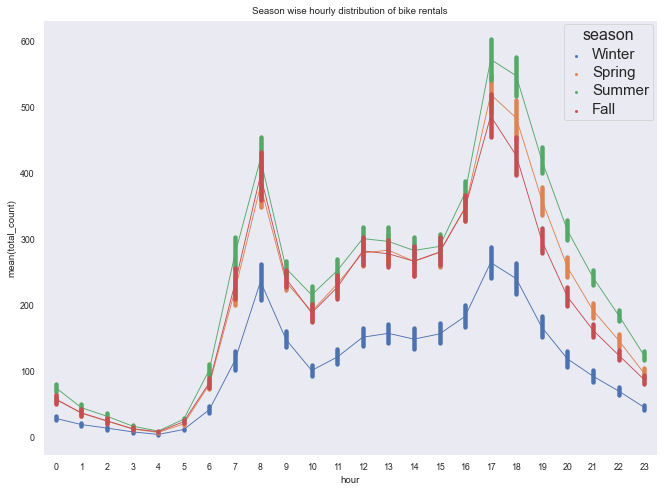

In [109]:
import seaborn as sns

sns.set(rc={'figure.figsize':(11,8)})

sns.set_context("paper", font_scale=1, rc={"lines.linewidth": 2.5})
#sns.set(style="ticks", context="talk")
#plt.style.use("dark_background")
sns.set_style("dark")

#fig, ax = plt.subplots()
ax = sns.pointplot(data = bike_data2[['hr','cnt','season']], x = 'hr', y = 'cnt',
              scale = 0.2, hue = 'season');

plt.setp(ax.get_legend().get_texts(), fontsize='15') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='16') # for legend title

ax.set(title = 'Season wise hourly distribution of bike rentals',ylabel= 'mean(total_count)', xlabel='hour');

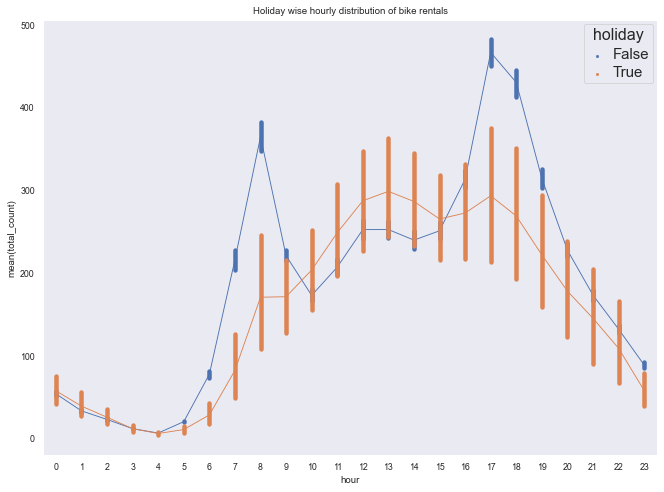

In [112]:
sns.set(rc={'figure.figsize':(11,8)})

sns.set_context("paper", font_scale=1, rc={"lines.linewidth": 2.5})
#sns.set(style="ticks", context="talk")
#plt.style.use("dark_background")
sns.set_style("dark")

#fig, ax = plt.subplots()
ax = sns.pointplot(data = bike_data2[['hr','cnt','holiday']], x = 'hr', y = 'cnt',
              scale = 0.2, hue = 'holiday');

plt.setp(ax.get_legend().get_texts(), fontsize='15') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='16') # for legend title

ax.set(title = 'Holiday wise hourly distribution of bike rentals',ylabel= 'mean(total_count)', xlabel='hour');

[Text(0.5, 1.0, 'Monthly distribution of bike rentals'),
 Text(0, 0.5, 'mean(total_count)'),
 Text(0.5, 0, 'Month')]

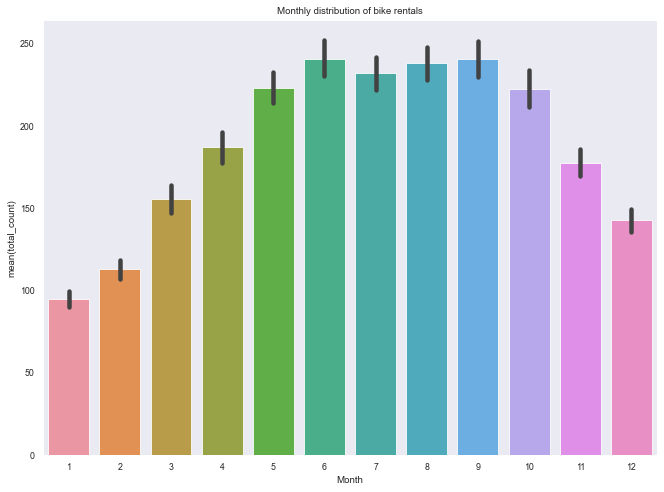

In [141]:
sns.set(rc={'figure.figsize':(11,8)})

sns.set_context("paper", font_scale=1, rc={"lines.linewidth": 2.5})
#sns.set(style="ticks", context="talk")
#plt.style.use("dark_background")
sns.set_style("dark")

#fig, ax = plt.subplots()

ax = sns.barplot(data = bike_data2[['cnt','mnth']], x = 'mnth', y = 'cnt');
ax.set(title = 'Monthly distribution of bike rentals',ylabel= 'mean(total_count)', xlabel='Month')


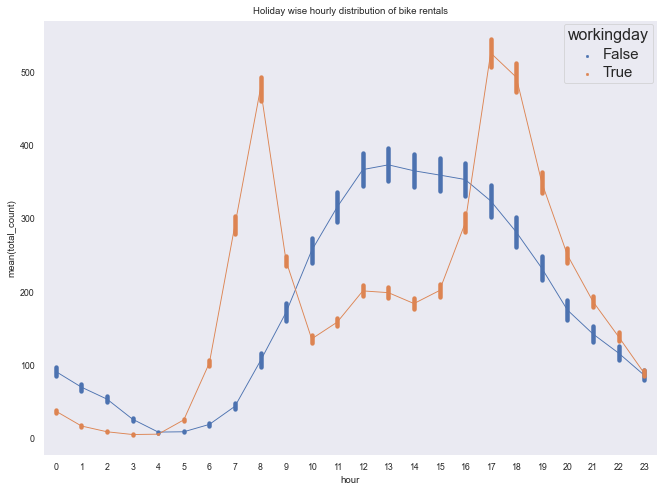

In [144]:
sns.set(rc={'figure.figsize':(11,8)})

sns.set_context("paper", font_scale=1, rc={"lines.linewidth": 2.5})
#sns.set(style="ticks", context="talk")
#plt.style.use("dark_background")
sns.set_style("dark")

#fig, ax = plt.subplots()
ax = sns.pointplot(data = bike_data2[['hr','cnt','workingday']], x = 'hr', y = 'cnt',
              scale = 0.2, hue = 'workingday');

plt.setp(ax.get_legend().get_texts(), fontsize='15') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='16') # for legend title

ax.set(title = 'Hourly distribution of bike rentals on working and non-working days',ylabel= 'mean(total_count)', xlabel='hour');

In [160]:
bike_data2.head()

instant     dteday  season  yr  mnth  hr holiday  weekday workingday  \
0        1 2011-01-01  Winter   0     1   0   False        6      False   
1        2 2011-01-01  Winter   0     1   1   False        6      False   
2        3 2011-01-01  Winter   0     1   2   False        6      False   
3        4 2011-01-01  Winter   0     1   3   False        6      False   
4        5 2011-01-01  Winter   0     1   4   False        6      False   

   weathersit  ...  HourIs13  HourIs14  HourIs15  HourIs16  HourIs17  \
0           1  ...       0.0       0.0       0.0       0.0       0.0   
1           1  ...       0.0       0.0       0.0       0.0       0.0   
2           1  ...       0.0       0.0       0.0       0.0       0.0   
3           1  ...       0.0       0.0       0.0       0.0       0.0   
4           1  ...       0.0       0.0       0.0       0.0       0.0   

   HourIs18  HourIs19  HourIs20  HourIs21  HourIs22  
0       0.0       0.0       0.0       0.0       0.0  
1       0.0       0.0       0.0       0.0       0.0  
2       0.0       0.0       0.0       0.0       0.0  
3       0.0       0.0       0.0       0.0       0.0  
4       0.0       0.0       0.0       0.0       0.0  

[5 rows x 52 columns]

Text(0.5, 0.98, 'Bike usage by hour and temperature')

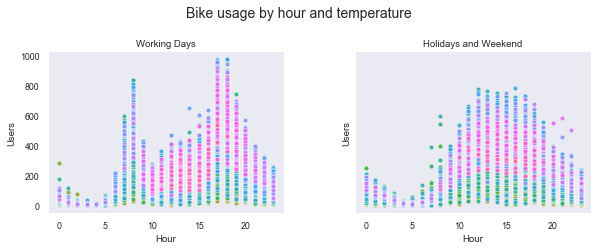

In [166]:
#Plots with color hues according to wine quality
g = sns.FacetGrid(bike_data2, col="workingday", hue='temp',
col_order=[1, 0],
aspect=1.2, size=3.5)
g.map(plt.scatter, "hr", "cnt", alpha=0.9, edgecolor='white', linewidth=0.5)
axes = g.axes.flatten()
axes[0].set_title("Working Days")
axes[0].set_xlabel('Hour')
axes[0].set_ylabel('Users')
axes[1].set_title("Holidays and Weekend")
axes[1].set_xlabel('Hour')
axes[1].set_ylabel('Users')
fig = g.fig
fig.subplots_adjust(top=0.8, wspace=0.3)
fig.suptitle('Bike usage by hour and temperature', fontsize=14)
#l = g.add_legend(title='ciao')

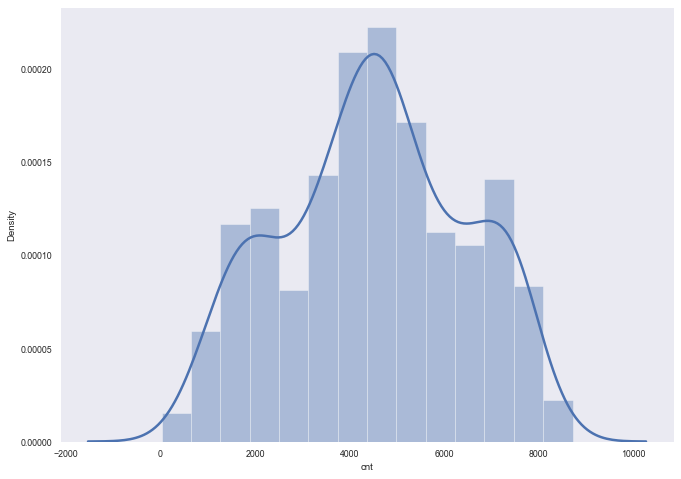

In [168]:
sns.distplot(bike_data.cnt); 
#The hourly data is highly right-skewed, the daily data not so much

In [170]:
q1 = bike_data.cnt.quantile(0.25)
q3 = bike_data.cnt.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr) 
bike_data_cut = bike_data.loc[(bike_data.cnt >= lower_bound) & (bike_data.cnt <= upper_bound)]

In [171]:
q1 = bike_data2.cnt.quantile(0.25)
q3 = bike_data2.cnt.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr) 
bike_data2_cut = bike_data2.loc[(bike_data2.cnt >= lower_bound) & (bike_data2.cnt <= upper_bound)]

In [174]:
bike_nec=bike_data[['workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered']]

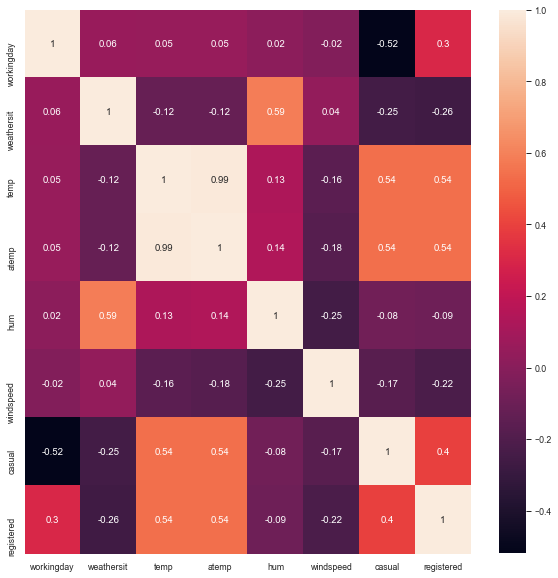

In [176]:
fig, ax = plt.subplots(figsize=(10,10))
correlation_mat = bike_nec.corr()
correlation_mat = correlation_mat.round(2)
sns.heatmap(correlation_mat, annot = True, ax=ax)
plt.show()

In [186]:
from sklearn.model_selection import cross_val_score 
regressor=LinearRegression()
regressor.fit(Xtrain,ytrain)
cross_val_score(regressor, X, y, cv=10)

array([-2.85378861,  0.24732134,  0.30512308,  0.36518776,  0.20672976,
        0.42419512,  0.53557551,  0.48614871,  0.47501183,  0.51917627])

In [180]:
y

array([16., 40., 32., ..., 90., 61., 49.])

In [3]:
import plotly

In [7]:
import plotly.express as px